## Bonus Questions

Question 1

In [5]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
import functions
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.svm import SVR, SVC
from sklearn.decomposition import PCA, KernelPCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RepeatedKFold, cross_val_score
from pathlib import Path
from typing import Optional, List

In [6]:
# Get the working directory
input_path = Path.cwd()
root = input_path.parent
data_path = root / "data" / "development_final_data.csv"
train_df = pd.read_csv(data_path, header=0)
# Go to the dev set and drop the target column as well as the columns that are not microbiome related
x = train_df.drop(columns=['BMI', 'Host age', 'Sex_Male'])
# Define y as the target variable
y = train_df['BMI']
# Do the same for the evaluation set
val_df = pd.read_csv(root / "data" / "evaluation_final_data.csv", header=0)
val_x = val_df.drop(columns=['BMI', 'Host age', 'Sex_Male'])
val_y = val_df['BMI']

In [3]:
models = [ElasticNet(), BayesianRidge(), SVR()]
for model in models:
    print(model.__class__.__name__)
    if model.__class__.__name__ == 'SVR':
        pipeline = functions.create_pipeline(
            model,
            scaler=False,
            feature_selector=PCA(n_components=90)
            )
    else:
        pipeline = functions.create_pipeline(
            model,
            scaler=False,
            feature_selector=PCA(n_components=47)
            )
    # Optuna with Bayesian method
    study = optuna.create_study(
        sampler=optuna.samplers.GPSampler(),
        direction='maximize'
    )
    study.optimize(lambda trial: functions.optuna_objective(trial, model, x, y, pipeline), n_trials=100)
    # Best hyperparameters
    print("Study statistics: ")
    print("  Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial
    print("  Value: ", trial.value)
    print("  Params: ")
    for key, value in trial.params.items():
            print(f"    {key}: {value}")



ElasticNet


/var/folders/mt/l606mr6x07q49h97jslphwm40000gn/T/ipykernel_3789/3581695003.py:18: ExperimentalWarning: GPSampler is experimental (supported from v3.6.0). The interface can change in the future.
  sampler=optuna.samplers.GPSampler(),
[I 2025-03-24 22:01:02,737] A new study created in memory with name: no-name-40124714-80a1-4453-8ae7-4802e26d822e
[I 2025-03-24 22:01:03,730] Trial 0 finished with value: -4.117101733388933 and parameters: {'alpha': 7.706143998730476, 'l1_ratio': 0.6219959689846266}. Best is trial 0 with value: -4.117101733388933.
[I 2025-03-24 22:01:04,596] Trial 1 finished with value: -4.117101733388933 and parameters: {'alpha': 6.150016785336548, 'l1_ratio': 0.9346289628495797}. Best is trial 0 with value: -4.117101733388933.
[I 2025-03-24 22:01:05,518] Trial 2 finished with value: -4.084954213370803 and parameters: {'alpha': 1.6983923564868357, 'l1_ratio': 0.6539682453844846}. Best is trial 2 with value: -4.084954213370803.
[I 2025-03-24 22:01:06,276] Trial 3 finished w

Study statistics: 
  Number of finished trials:  100
Best trial:
  Value:  -4.02497788086773
  Params: 
    alpha: 4.970254390813719
    l1_ratio: 0.0
BayesianRidge


[I 2025-03-24 22:05:01,978] Trial 0 finished with value: -4.046409985651986 and parameters: {'alpha_1': 1.6886270637477148e-05, 'lambda_1': 1.0572615207559907e-05, 'alpha_2': 8.765286738278806e-08, 'lambda_2': 1.6535467647191735e-08}. Best is trial 0 with value: -4.046409985651986.
[I 2025-03-24 22:05:02,955] Trial 1 finished with value: -4.046409886780294 and parameters: {'alpha_1': 4.805660200630332e-05, 'lambda_1': 3.181269796400875e-05, 'alpha_2': 1.0029212510120826e-06, 'lambda_2': 2.0821267654497287e-07}. Best is trial 1 with value: -4.046409886780294.
[I 2025-03-24 22:05:03,961] Trial 2 finished with value: -4.0464103711886805 and parameters: {'alpha_1': 2.890264885659635e-07, 'lambda_1': 1.1820526416050884e-08, 'alpha_2': 6.338993565278172e-08, 'lambda_2': 8.739423903043534e-07}. Best is trial 1 with value: -4.046409886780294.
[I 2025-03-24 22:05:04,923] Trial 3 finished with value: -4.046410083460859 and parameters: {'alpha_1': 1.9363293207787482e-08, 'lambda_1': 2.05771917246

Study statistics: 
  Number of finished trials:  100
Best trial:
  Value:  -4.0464092002733185
  Params: 
    alpha_1: 1e-08
    lambda_1: 0.0001
    alpha_2: 0.0001
    lambda_2: 1e-08
SVR


[I 2025-03-24 22:07:05,307] Trial 0 finished with value: -3.971696242907143 and parameters: {'C': 3.5593637751613767, 'gamma': 'auto', 'epsilon': 0.5447575824837358, 'kernel': 'rbf'}. Best is trial 0 with value: -3.971696242907143.
[I 2025-03-24 22:07:07,061] Trial 1 finished with value: -1349.167579394453 and parameters: {'C': 6.534228569868755, 'gamma': 'scale', 'epsilon': 0.8361053219824351, 'kernel': 'poly', 'degree': 5, 'coef0': 0.9360801181010617}. Best is trial 0 with value: -3.971696242907143.
[I 2025-03-24 22:07:09,057] Trial 2 finished with value: -3.993039994029337 and parameters: {'C': 9.072580181317221, 'gamma': 'auto', 'epsilon': 0.4090520547842417, 'kernel': 'rbf'}. Best is trial 0 with value: -3.971696242907143.
[I 2025-03-24 22:07:10,624] Trial 3 finished with value: -43.19297167377294 and parameters: {'C': 5.674341010518545, 'gamma': 'scale', 'epsilon': 0.8105918402824952, 'kernel': 'poly', 'degree': 3, 'coef0': 0.30938094839018604}. Best is trial 0 with value: -3.971

Study statistics: 
  Number of finished trials:  100
Best trial:
  Value:  -3.958812549609144
  Params: 
    C: 4.280892141302089
    gamma: scale
    epsilon: 0.01
    kernel: rbf


ElasticNet


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.088e+03, tolerance: 8.640e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e+03, tolerance: 7.571e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

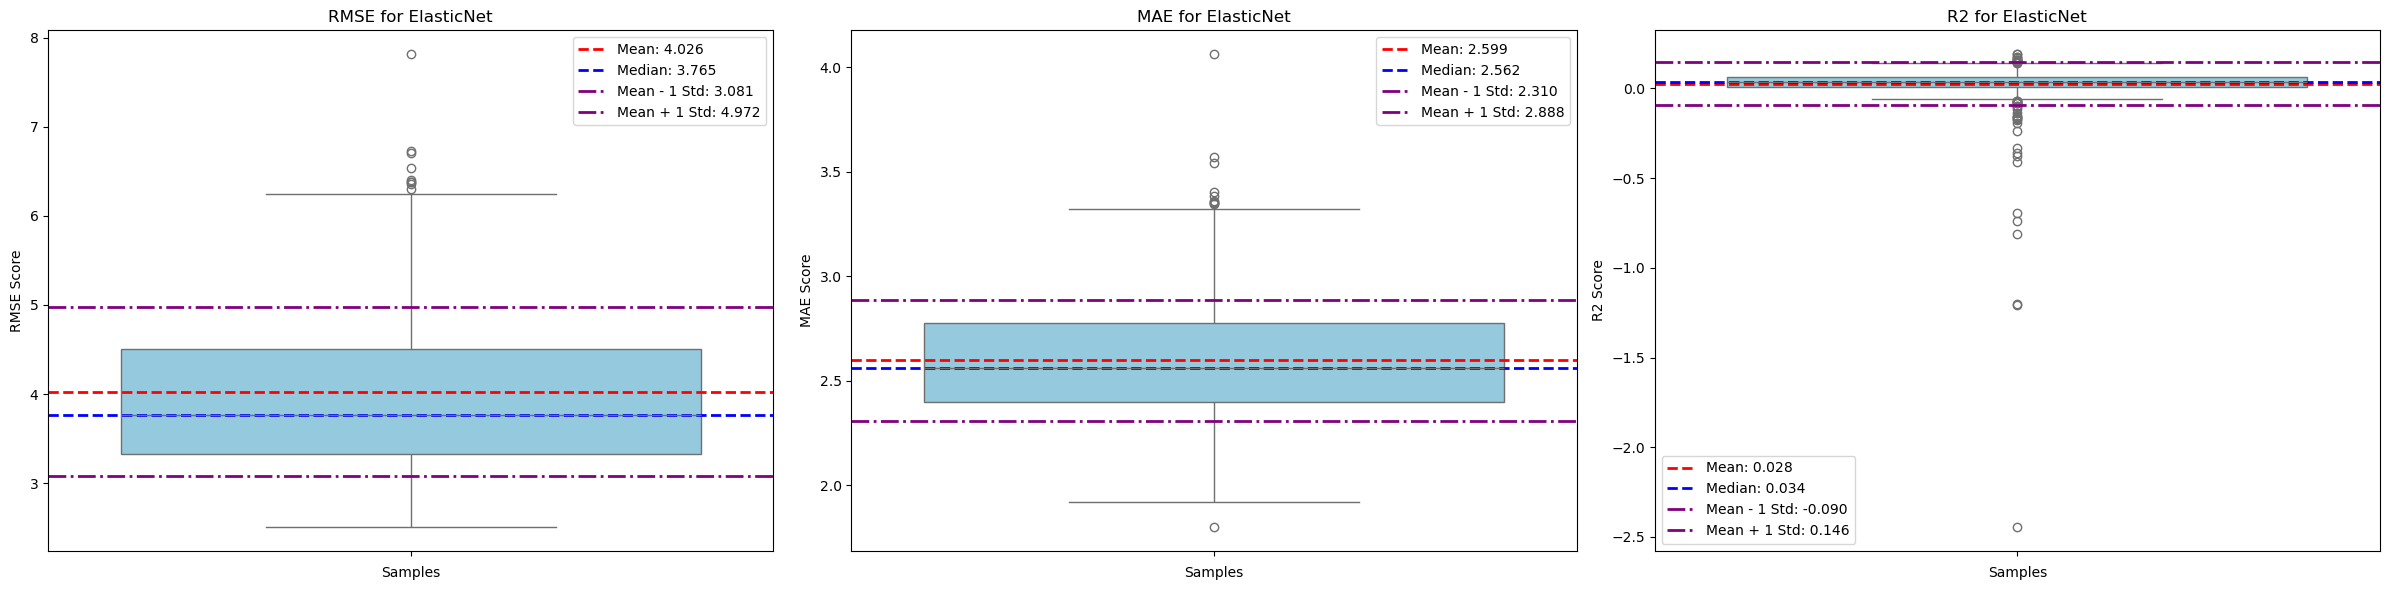

BayesianRidge


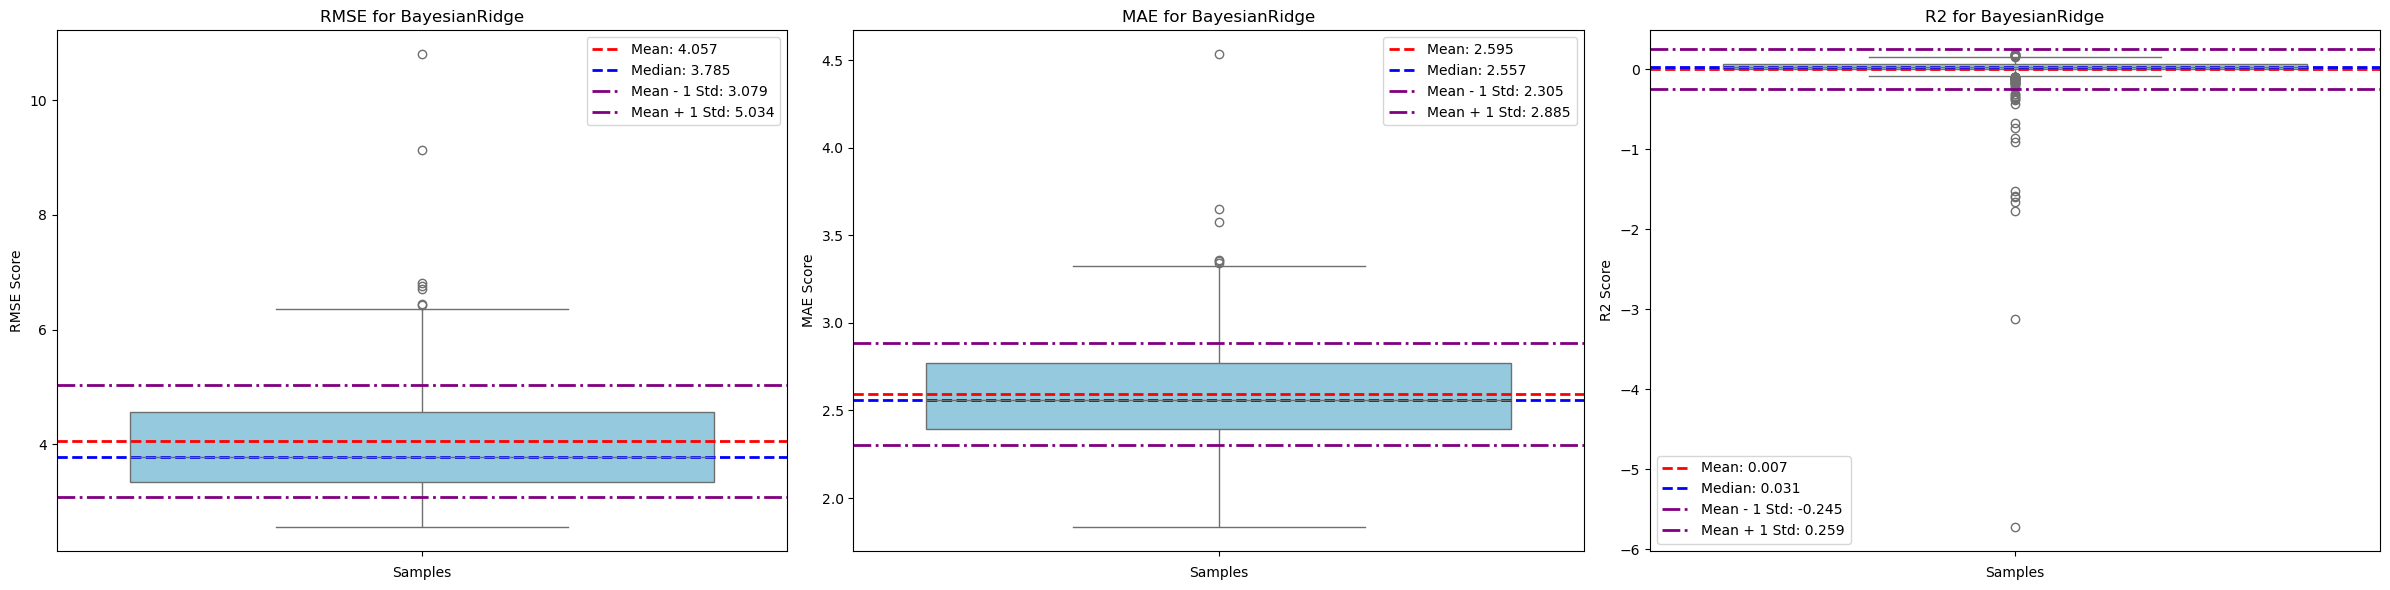

SVR


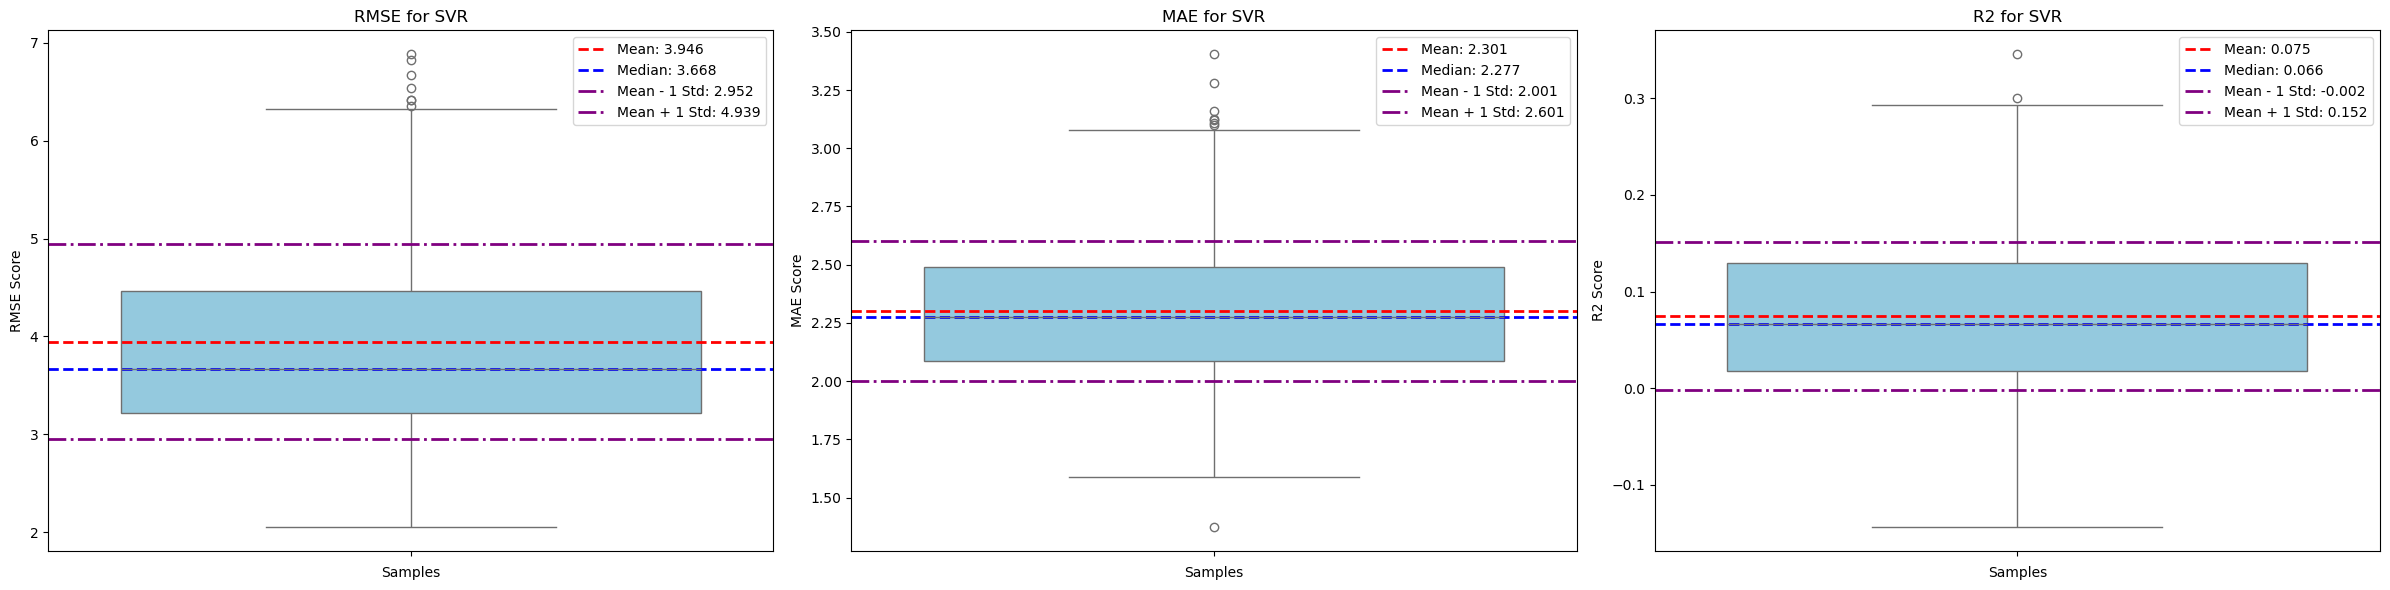

In [3]:
models = [ElasticNet(alpha=4.970254390813719, l1_ratio=0.0), BayesianRidge(alpha_1=1e-8, alpha_2=1e-4, lambda_1=1e-4, lambda_2=1e-8), SVR(C=4.280892141302089, gamma='scale', epsilon=0.01, kernel='rbf')]
for model in models:
    print(model.__class__.__name__)
    if model.__class__.__name__ == 'SVR':
        pipeline = functions.create_pipeline(
            model,
            scaler=False,
            feature_selector=PCA(n_components=90)
            )
    else:
        pipeline = functions.create_pipeline(
            model,
            scaler=False,
            feature_selector=PCA(n_components=47)
            )
    functions.bootstrap2boxplot(
        x, y,
        val_x, val_y,
        pipeline, n_iter=200,
        bstrap=False, kf=True,
        root_path=root,
        filename=f"{model.__class__.__name__}_optuna_bayesian.pkl",
        save=True, default_path=True
    )

ElasticNet


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.088e+03, tolerance: 8.640e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.088e+03, tolerance: 8.640e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

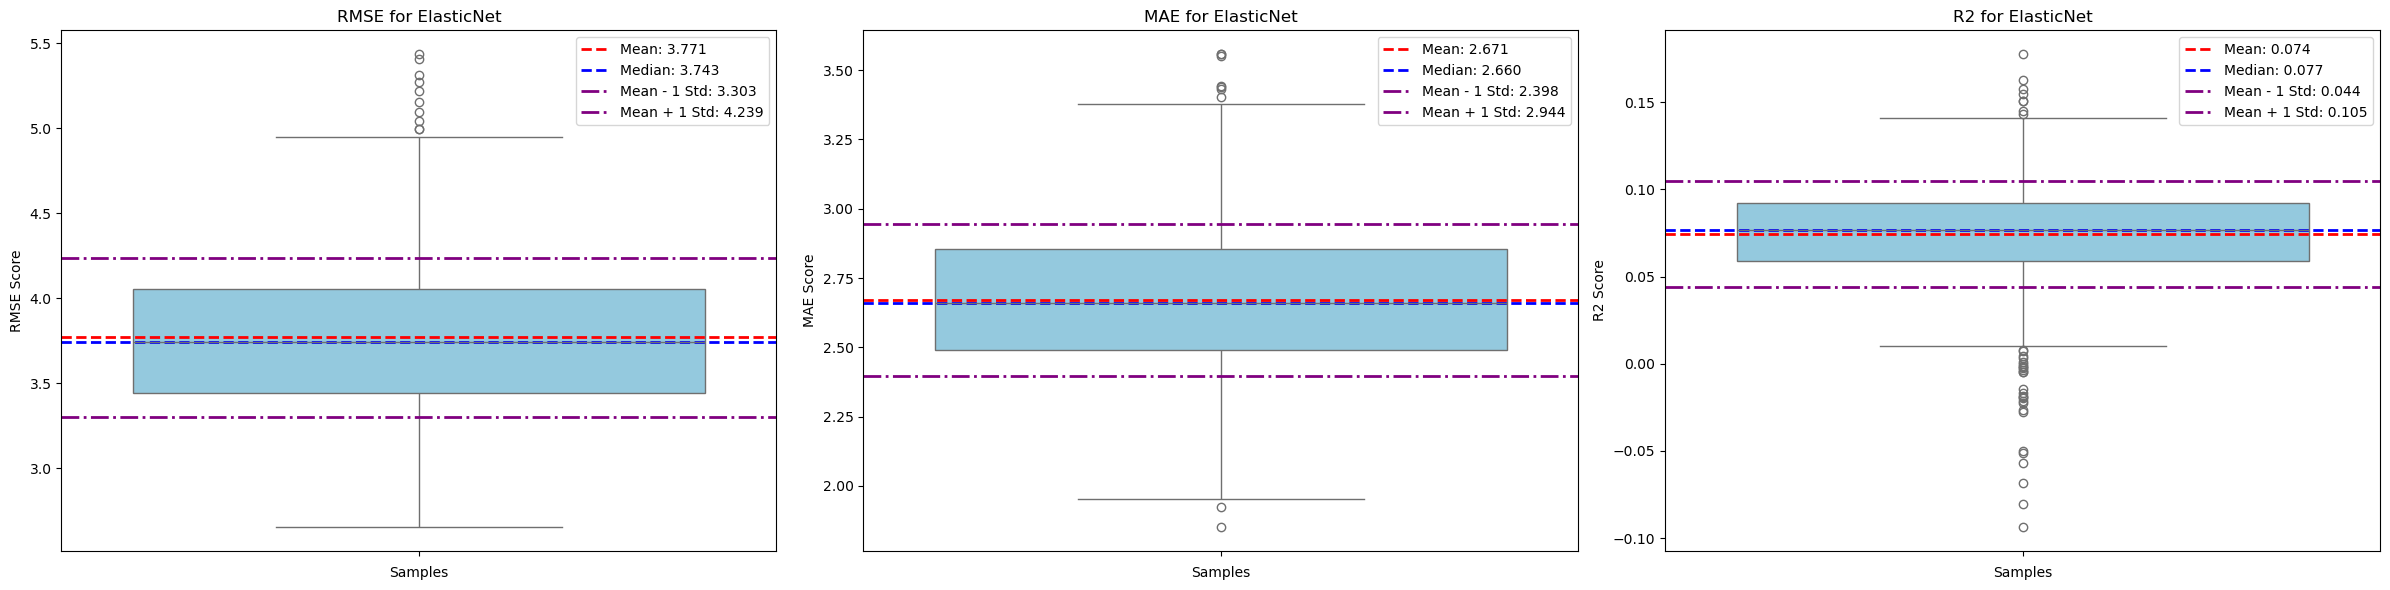

BayesianRidge


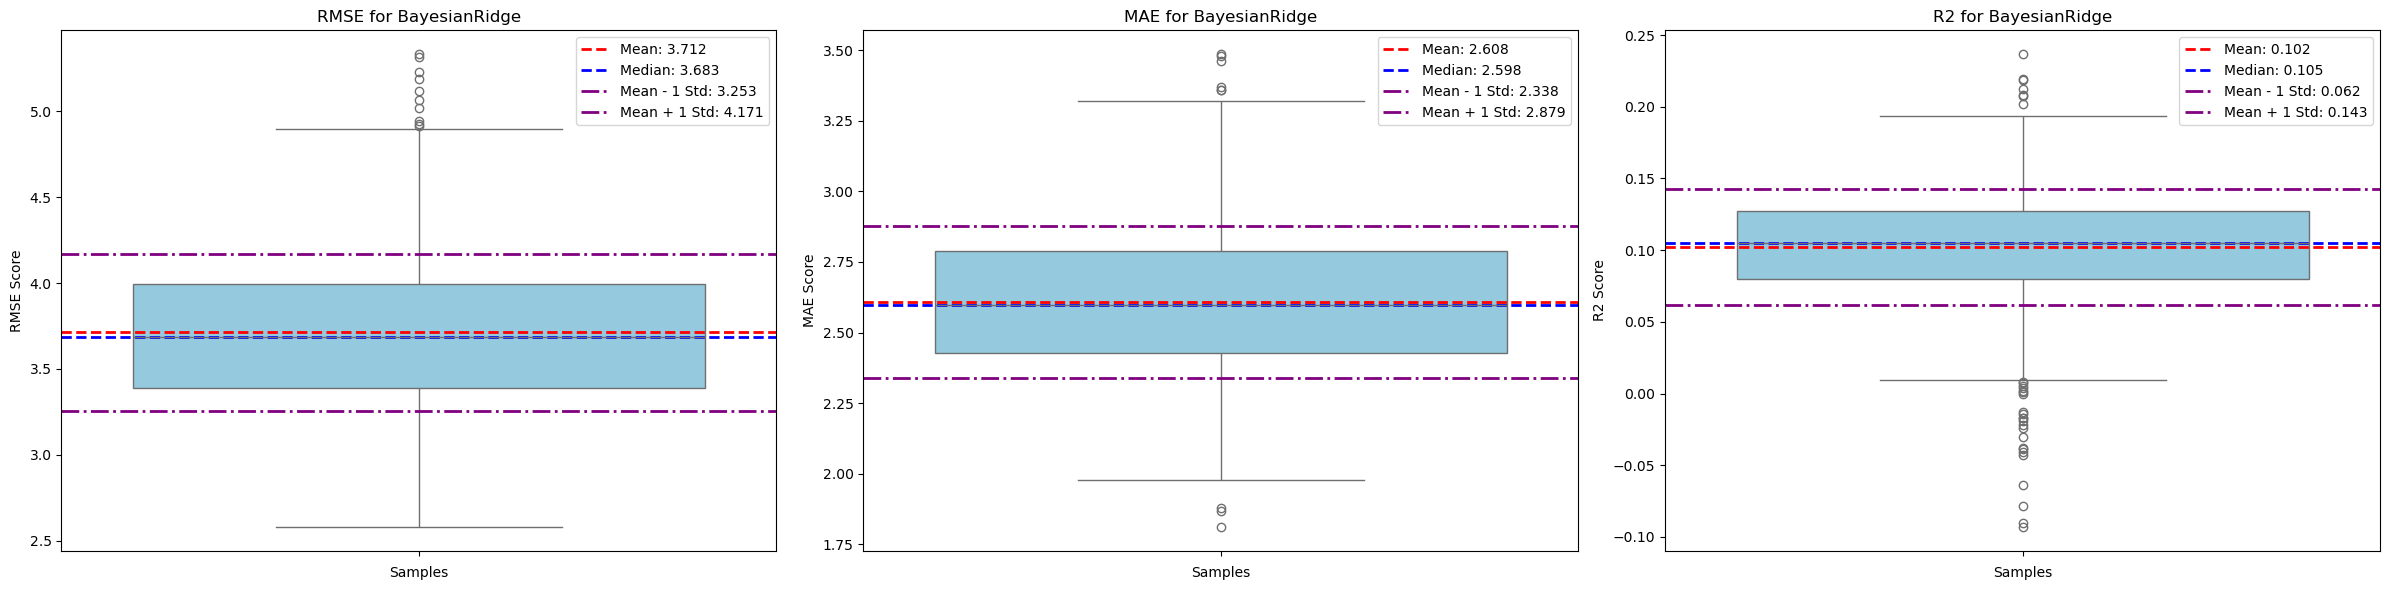

SVR


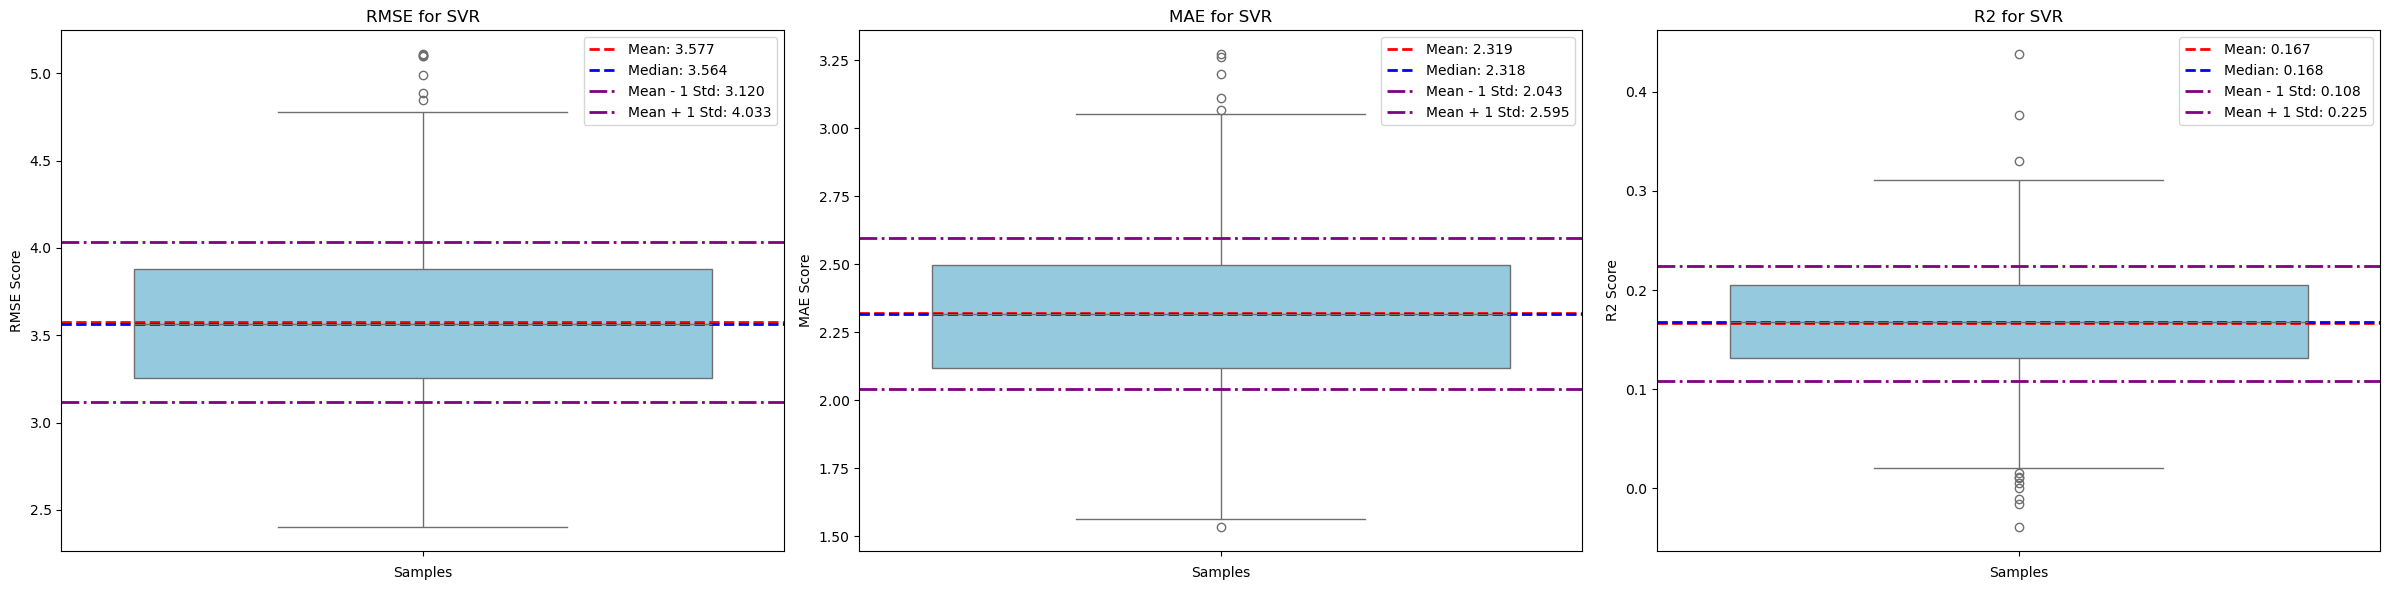

In [4]:
models = [ElasticNet(alpha=4.970254390813719, l1_ratio=0.0), BayesianRidge(alpha_1=1e-8, alpha_2=1e-4, lambda_1=1e-4, lambda_2=1e-8), SVR(C=4.280892141302089, gamma='scale', epsilon=0.01, kernel='rbf')]
for model in models:
    print(model.__class__.__name__)
    if model.__class__.__name__ == 'SVR':
        pipeline = functions.create_pipeline(
            model,
            scaler=False,
            feature_selector=PCA(n_components=90)
            )
    else:
        pipeline = functions.create_pipeline(
            model,
            scaler=False,
            feature_selector=PCA(n_components=47)
            )
    functions.bootstrap2boxplot(
        x, y,
        val_x, val_y,
        pipeline, n_iter=1000,
        bstrap=True, kf=False,
        save=False
    )

In [7]:
new_df = functions.add_bmi_category(
    train_df
)
new_val_df = functions.add_bmi_category(
    val_df
)
new_df.head()

,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,...,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus,Sex_Male,BMI_Category
0,0.400741,19.01,-0.116074,-0.151651,-0.366867,-0.154353,-0.357553,-0.396184,-0.258769,-0.239862,...,-0.178185,-0.497202,-0.161263,-0.315570,-0.357998,-0.129594,-0.214033,0.019673,1.0,Normal weight
1,-1.635900,23.50,-0.108980,-0.151651,-0.366867,-0.154353,2.663768,-0.393737,-0.258769,-0.239862,...,2.108974,-0.481538,-0.170765,-0.315570,0.118380,0.024110,0.196608,-0.210150,0.0,Normal weight
2,0.337096,25.80,-0.106369,-0.151651,-0.366867,-0.019414,-0.361007,-0.077031,-0.258769,-0.239862,...,-0.162598,-0.461486,-0.170765,-0.315570,-0.357998,-0.129594,-0.199298,-0.180683,1.0,Overweight
3,-0.426644,23.49,-0.116074,-0.106995,-0.026565,-0.154353,-0.351405,-0.389180,1.200847,-0.239862,...,-0.178185,0.309746,-0.071131,0.515577,-0.357998,-0.129594,-0.230236,-0.221277,0.0,Normal weight
4,-1.063095,22.60,-0.096208,0.037702,8.788685,-0.154353,-0.158938,-0.396184,-0.258769,-0.239862,...,-0.178185,-0.233995,0.005653,0.368071,0.740698,-0.129594,0.070595,-0.193578,0.0,Normal weight
